#importações

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Escolha do arquivo da API (Kaglle.jason)

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"lfernandod","key":"ef49dfb6774773921a8c08c4ed1048ba"}'}

## Instalação do pacote kaglle para autenticação e interação com a plataforma

In [ ]:
pip install kaggle -q

## Criando uma pasta chamada kaglle para armazenar o arquivo da API


In [ ]:
!mkdir -p ~/.kaggle

## Copiar o arquivo kaggle.json para o diretório .kaggle no diretório home do usuário

In [ ]:
!cp kaggle.json ~/.kaggle

## Token de validação para acesso para os integrantes do grupo


In [ ]:
!chmod 666 ~/.kaggle/kaggle.json

## Visualiza todos os datassetes da plataforma Kaglle

In [ ]:
!kaggle datasets list

ref                                                                 title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20           9187        194  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           7132        151  1.0              
sujalsuthar/amazon-delivery-dataset                                 Amazon Delivery Dataset                              2MB  2024-07-02 03:39:48            761         24  1.0              
fahmidachowdhury/customer-segmentation-data-f

## Realiza o download das criptomoedas em formato (.zip) e põe o arquivo dentro da pasta content do colab

In [ ]:
%cd /content/
!kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory



/content
Dataset URL: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory
License(s): CC0-1.0
cryptocurrencypricehistory.zip: Skipping, found more recently modified local copy (use --force to force download)


## tira todas as moedas da pasta zip e põe dentro de uma nova pasta chamada cryptos

In [ ]:
!unzip cryptocurrencypricehistory.zip -d cryptos

Archive:  cryptocurrencypricehistory.zip
replace cryptos/coin_Aave.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Armazena as 10 moedas que serão usadas em suas respectivas variaveis

In [ ]:
bitcoin = pd.read_csv('/content/cryptos/coin_Bitcoin.csv')
#print(bitcoin.head())
ethereum = pd.read_csv('/content/cryptos/coin_Ethereum.csv')
#print(ethereum.head())
ripple = pd.read_csv('/content/cryptos/coin_XRP.csv')
#print(ripple.head())
litecoin = pd.read_csv('/content/cryptos/coin_Litecoin.csv')
#print(litecoin.head())
cardano = pd.read_csv('/content/cryptos/coin_Cardano.csv')
#print(cardano.head())
polkadot = pd.read_csv('/content/cryptos/coin_Polkadot.csv')
#print(polkadot.head())
binance = pd.read_csv('/content/cryptos/coin_BinanceCoin.csv')
#print(binance.head())
chainlink = pd.read_csv('/content/cryptos/coin_ChainLink.csv')
#print(chainlink.head())
stellar = pd.read_csv('/content/cryptos/coin_Stellar.csv')
#print(stellar.head())
dogecoin = pd.read_csv('/content/cryptos/coin_Dogecoin.csv')

## Criação de um dicionario que armazena todos os dataframes, renomeando as criptos e iniciando a limpeza dos dados

In [ ]:
# Configuração da opção de exibição, números de ponto flutuante com três casas decimais e incluir vírgulas como separadores de milhares ao exibi-los.
pd.set_option('display.float_format','{:,.3f}'.format)

criptomoedas = {
    'Bitcoin': bitcoin,
    'Ethereum': ethereum,
    'Ripple': ripple,
    'Litecoin': litecoin,
    'Cardano': cardano,
    'Polkadot': polkadot,
    'BinanceCoin': binance,
    'ChainLink': chainlink,
    'Stellar': stellar,
    'Dogecoin': dogecoin
}

# criptomoedas


## Função que transforma todos os datafames em um só

In [ ]:
# Lista para armazenar os DataFrames ajustados
dfs = []

# Ajustar e adicionar cada DataFrame à lista
for coin_name, coin_data in criptomoedas.items():
    # Resetar o índice de cada DataFrame e adicionar a coluna 'Coin'
    coin_data_reset = coin_data.reset_index(drop=True)
    dfs.append(coin_data_reset)

# Concatenar todos os DataFrames em um único DataFrame
result_df = pd.concat(dfs, ignore_index=True)

# Verificar o DataFrame concatenado
display(result_df)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488,134.000,134.444,144.540,0.000,"1,603,768,864.500"
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.930,134.050,144.000,139.000,0.000,"1,542,813,125.000"
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.890,107.720,139.000,116.990,0.000,"1,298,954,593.750"
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.600,92.282,116.380,105.210,0.000,"1,168,517,495.250"
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.128,79.100,106.250,97.750,0.000,"1,085,995,168.750"
...,...,...,...,...,...,...,...,...,...,...
20838,2756,Dogecoin,DOGE,2021-07-02 23:59:59,0.248,0.239,0.244,0.245,"1,321,470,954.370","31,949,253,278.160"
20839,2757,Dogecoin,DOGE,2021-07-03 23:59:59,0.250,0.242,0.245,0.246,"917,015,818.900","32,104,908,914.690"
20840,2758,Dogecoin,DOGE,2021-07-04 23:59:59,0.253,0.243,0.246,0.246,"973,511,518.610","32,117,665,810.760"
20841,2759,Dogecoin,DOGE,2021-07-05 23:59:59,0.246,0.228,0.246,0.232,"1,267,949,362.220","30,183,443,827.370"


# Limpeza das colunas desnecessarias para a analise dos dados

In [ ]:

# Exclusão das colunas Symbol e SNo
result_df_limpo = result_df.drop(columns=['Symbol', 'SNo'])
result_df_limpo

,Name,Date,High,Low,Open,Close,Volume,Marketcap
0,Bitcoin,2013-04-29 23:59:59,147.488,134.000,134.444,144.540,0.000,"1,603,768,864.500"
1,Bitcoin,2013-04-30 23:59:59,146.930,134.050,144.000,139.000,0.000,"1,542,813,125.000"
2,Bitcoin,2013-05-01 23:59:59,139.890,107.720,139.000,116.990,0.000,"1,298,954,593.750"
3,Bitcoin,2013-05-02 23:59:59,125.600,92.282,116.380,105.210,0.000,"1,168,517,495.250"
4,Bitcoin,2013-05-03 23:59:59,108.128,79.100,106.250,97.750,0.000,"1,085,995,168.750"
...,...,...,...,...,...,...,...,...
20838,Dogecoin,2021-07-02 23:59:59,0.248,0.239,0.244,0.245,"1,321,470,954.370","31,949,253,278.160"
20839,Dogecoin,2021-07-03 23:59:59,0.250,0.242,0.245,0.246,"917,015,818.900","32,104,908,914.690"
20840,Dogecoin,2021-07-04 23:59:59,0.253,0.243,0.246,0.246,"973,511,518.610","32,117,665,810.760"
20841,Dogecoin,2021-07-05 23:59:59,0.246,0.228,0.246,0.232,"1,267,949,362.220","30,183,443,827.370"


# Adição e conversão de colunas





In [ ]:
# Adicionar uma coluna do dia da semana
result_df_limpo['Date'] = pd.to_datetime(result_df_limpo['Date'])
result_df_limpo['Day_of_Week'] = result_df_limpo['Date'].dt.day_name()

In [ ]:
# Converter a coluna 'Date' para datetime e manter apenas a parte da data
result_df_limpo['Date'] = pd.to_datetime(result_df_limpo['Date']).dt.date

# Mostrar o DataFrame resultante
result_df_limpo

,Name,Date,High,Low,Open,Close,Volume,Marketcap,Day_of_Week
0,Bitcoin,2013-04-29,147.488,134.000,134.444,144.540,0.000,"1,603,768,864.500",Monday
1,Bitcoin,2013-04-30,146.930,134.050,144.000,139.000,0.000,"1,542,813,125.000",Tuesday
2,Bitcoin,2013-05-01,139.890,107.720,139.000,116.990,0.000,"1,298,954,593.750",Wednesday
3,Bitcoin,2013-05-02,125.600,92.282,116.380,105.210,0.000,"1,168,517,495.250",Thursday
4,Bitcoin,2013-05-03,108.128,79.100,106.250,97.750,0.000,"1,085,995,168.750",Friday
...,...,...,...,...,...,...,...,...,...
20838,Dogecoin,2021-07-02,0.248,0.239,0.244,0.245,"1,321,470,954.370","31,949,253,278.160",Friday
20839,Dogecoin,2021-07-03,0.250,0.242,0.245,0.246,"917,015,818.900","32,104,908,914.690",Saturday
20840,Dogecoin,2021-07-04,0.253,0.243,0.246,0.246,"973,511,518.610","32,117,665,810.760",Sunday
20841,Dogecoin,2021-07-05,0.246,0.228,0.246,0.232,"1,267,949,362.220","30,183,443,827.370",Monday


In [ ]:
type(result_df_limpo.Date)

pandas.core.series.Series

In [ ]:
# Filtrar e criar um novo dataframe com linhas onde qualquer coluna tem valor igual a 0
linhas_excluidas = result_df_limpo.loc[(result_df_limpo == 0).any(axis=1)]

# Excluir as linhas do dataframe original
result_df_limpo = result_df_limpo.loc[(result_df_limpo != 0).all(axis=1)]

# Exibir os dataframes resultantes
print("Dataframe limpo:")
result_df_limpo

Dataframe limpo:


,Name,Date,High,Low,Open,Close,Volume,Marketcap,Day_of_Week
242,Bitcoin,2013-12-27,777.510,713.600,763.280,735.070,"46,862,700.000","8,955,394,563.500",Friday
243,Bitcoin,2013-12-28,747.060,705.350,737.980,727.830,"32,505,800.000","8,869,918,644.000",Saturday
244,Bitcoin,2013-12-29,748.610,714.440,728.050,745.050,"19,011,300.000","9,082,103,621.250",Sunday
245,Bitcoin,2013-12-30,766.600,740.240,741.350,756.130,"20,707,700.000","9,217,167,990.250",Monday
246,Bitcoin,2013-12-31,760.580,738.170,760.320,754.010,"20,897,300.000","9,191,325,349.250",Tuesday
...,...,...,...,...,...,...,...,...,...
20838,Dogecoin,2021-07-02,0.248,0.239,0.244,0.245,"1,321,470,954.370","31,949,253,278.160",Friday
20839,Dogecoin,2021-07-03,0.250,0.242,0.245,0.246,"917,015,818.900","32,104,908,914.690",Saturday
20840,Dogecoin,2021-07-04,0.253,0.243,0.246,0.246,"973,511,518.610","32,117,665,810.760",Sunday
20841,Dogecoin,2021-07-05,0.246,0.228,0.246,0.232,"1,267,949,362.220","30,183,443,827.370",Monday


In [ ]:
print("\nLinhas excluídas:")
linhas_excluidas


Linhas excluídas:


,Name,Date,High,Low,Open,Close,Volume,Marketcap,Day_of_Week
0,Bitcoin,2013-04-29,147.488,134.000,134.444,144.540,0.000,"1,603,768,864.500",Monday
1,Bitcoin,2013-04-30,146.930,134.050,144.000,139.000,0.000,"1,542,813,125.000",Tuesday
2,Bitcoin,2013-05-01,139.890,107.720,139.000,116.990,0.000,"1,298,954,593.750",Wednesday
3,Bitcoin,2013-05-02,125.600,92.282,116.380,105.210,0.000,"1,168,517,495.250",Thursday
4,Bitcoin,2013-05-03,108.128,79.100,106.250,97.750,0.000,"1,085,995,168.750",Friday
...,...,...,...,...,...,...,...,...,...
18089,Dogecoin,2013-12-22,0.000,0.000,0.000,0.000,0.000,"3,706,592.188",Sunday
18090,Dogecoin,2013-12-23,0.000,0.000,0.000,0.000,0.000,"5,644,793.351",Monday
18091,Dogecoin,2013-12-24,0.001,0.000,0.000,0.001,0.000,"9,075,937.823",Tuesday
18092,Dogecoin,2013-12-25,0.001,0.001,0.001,0.001,0.000,"8,194,483.244",Wednesday


In [ ]:
# Criando a nova coluna "Variação" com a subtração das colunas "Open" e "Low"
result_df_limpo['Variation'] = result_df_limpo['Close'] - result_df_limpo['Open']

# Exibindo o dataframe resultante para verificar a nova coluna
result_df_limpo


,Name,Date,High,Low,Open,Close,Volume,Marketcap,Day_of_Week,Variation,Variation (%),Year,% Variation
0,Bitcoin,2013-12-27,777.510,713.600,763.280,735.070,"46,862,700.000","8,955,394,563.500",Friday,-28.210,-0.037,2013,-0.005
1,Bitcoin,2013-12-28,747.060,705.350,737.980,727.830,"32,505,800.000","8,869,918,644.000",Saturday,-10.150,-0.014,2013,-0.002
2,Bitcoin,2013-12-29,748.610,714.440,728.050,745.050,"19,011,300.000","9,082,103,621.250",Sunday,17.000,0.023,2013,0.003
3,Bitcoin,2013-12-30,766.600,740.240,741.350,756.130,"20,707,700.000","9,217,167,990.250",Monday,14.780,0.020,2013,0.003
4,Bitcoin,2013-12-31,760.580,738.170,760.320,754.010,"20,897,300.000","9,191,325,349.250",Tuesday,-6.310,-0.008,2013,-0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20187,Dogecoin,2021-07-02,0.248,0.239,0.244,0.245,"1,321,470,954.370","31,949,253,278.160",Friday,0.001,0.005,2021,2.153
20188,Dogecoin,2021-07-03,0.250,0.242,0.245,0.246,"917,015,818.900","32,104,908,914.690",Saturday,0.001,0.005,2021,2.173
20189,Dogecoin,2021-07-04,0.253,0.243,0.246,0.246,"973,511,518.610","32,117,665,810.760",Sunday,0.000,0.000,2021,0.096
20190,Dogecoin,2021-07-05,0.246,0.228,0.246,0.232,"1,267,949,362.220","30,183,443,827.370",Monday,-0.015,-0.060,2021,-24.381


In [ ]:
# Calculando a variação percentual
result_df_limpo['Variation (%)'] = (result_df_limpo['Variation'] / result_df_limpo['Open'])

# Exibindo o DataFrame com a nova coluna
result_df_limpo

<ipython-input-56-4af75806f0eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_limpo['Variation (%)'] = (result_df_limpo['Variation'] / result_df_limpo['Open'])


,Name,Date,High,Low,Open,Close,Volume,Marketcap,Day_of_Week,Variation,Variation (%)
242,Bitcoin,2013-12-27,777.510,713.600,763.280,735.070,"46,862,700.000","8,955,394,563.500",Friday,-28.210,-0.037
243,Bitcoin,2013-12-28,747.060,705.350,737.980,727.830,"32,505,800.000","8,869,918,644.000",Saturday,-10.150,-0.014
244,Bitcoin,2013-12-29,748.610,714.440,728.050,745.050,"19,011,300.000","9,082,103,621.250",Sunday,17.000,0.023
245,Bitcoin,2013-12-30,766.600,740.240,741.350,756.130,"20,707,700.000","9,217,167,990.250",Monday,14.780,0.020
246,Bitcoin,2013-12-31,760.580,738.170,760.320,754.010,"20,897,300.000","9,191,325,349.250",Tuesday,-6.310,-0.008
...,...,...,...,...,...,...,...,...,...,...,...
20838,Dogecoin,2021-07-02,0.248,0.239,0.244,0.245,"1,321,470,954.370","31,949,253,278.160",Friday,0.001,0.005
20839,Dogecoin,2021-07-03,0.250,0.242,0.245,0.246,"917,015,818.900","32,104,908,914.690",Saturday,0.001,0.005
20840,Dogecoin,2021-07-04,0.253,0.243,0.246,0.246,"973,511,518.610","32,117,665,810.760",Sunday,0.000,0.000
20841,Dogecoin,2021-07-05,0.246,0.228,0.246,0.232,"1,267,949,362.220","30,183,443,827.370",Monday,-0.015,-0.060


In [ ]:
# Excluindo o índice
result_df_limpo = result_df_limpo.reset_index(drop=True)

# Exibindo o DataFrame sem o índice
result_df_limpo

,Name,Date,High,Low,Open,Close,Volume,Marketcap,Day_of_Week,Variation,Variation (%)
0,Bitcoin,2013-12-27,777.510,713.600,763.280,735.070,"46,862,700.000","8,955,394,563.500",Friday,-28.210,-0.037
1,Bitcoin,2013-12-28,747.060,705.350,737.980,727.830,"32,505,800.000","8,869,918,644.000",Saturday,-10.150,-0.014
2,Bitcoin,2013-12-29,748.610,714.440,728.050,745.050,"19,011,300.000","9,082,103,621.250",Sunday,17.000,0.023
3,Bitcoin,2013-12-30,766.600,740.240,741.350,756.130,"20,707,700.000","9,217,167,990.250",Monday,14.780,0.020
4,Bitcoin,2013-12-31,760.580,738.170,760.320,754.010,"20,897,300.000","9,191,325,349.250",Tuesday,-6.310,-0.008
...,...,...,...,...,...,...,...,...,...,...,...
20187,Dogecoin,2021-07-02,0.248,0.239,0.244,0.245,"1,321,470,954.370","31,949,253,278.160",Friday,0.001,0.005
20188,Dogecoin,2021-07-03,0.250,0.242,0.245,0.246,"917,015,818.900","32,104,908,914.690",Saturday,0.001,0.005
20189,Dogecoin,2021-07-04,0.253,0.243,0.246,0.246,"973,511,518.610","32,117,665,810.760",Sunday,0.000,0.000
20190,Dogecoin,2021-07-05,0.246,0.228,0.246,0.232,"1,267,949,362.220","30,183,443,827.370",Monday,-0.015,-0.060


In [ ]:
# Converter a coluna 'Date' para o tipo datetime
result_df_limpo['Date'] = pd.to_datetime(result_df_limpo['Date'])

# Extrair o ano da coluna 'Date' e criar uma nova coluna 'Year'
result_df_limpo['Year'] = result_df_limpo['Date'].dt.year

# Agrupar por 'Name' e 'Year' e obter o valor de fechamento anual (último valor de fechamento do ano)
annual_close = result_df_limpo.groupby(['Name', 'Year'])['Close'].last().reset_index()

# Calcular a variação anual para cada moeda
annual_close['Annual_Variation'] = annual_close.groupby('Name')['Close'].diff()

# Calcular a variação percentual anual para cada moeda
annual_close['Annual_Variation_%'] = annual_close.groupby('Name')['Close'].pct_change()

# Remover linhas com valores "NaN"
annual_close = annual_close.dropna(subset=['Annual_Variation', 'Annual_Variation_%'])

# Exibir o DataFrame com a variação anual e variação percentual anual
annual_close


,Name,Year,Close,Annual_Variation,Annual_Variation_%
1,Binance Coin,2018,6.165,-2.471,-0.286
2,Binance Coin,2019,13.728,7.563,1.227
3,Binance Coin,2020,37.376,23.648,1.723
4,Binance Coin,2021,320.935,283.559,7.587
6,Bitcoin,2014,320.193,-433.817,-0.575
7,Bitcoin,2015,430.567,110.374,0.345
8,Bitcoin,2016,963.743,533.176,1.238
9,Bitcoin,2017,"14,156.400","13,192.657",13.689
10,Bitcoin,2018,"3,742.700","-10,413.700",-0.736
11,Bitcoin,2019,"7,193.599","3,450.899",0.922


In [ ]:
annual_close.to_csv("annual_close2.csv")
result_df_limpo.to_csv("result_df_limpo2.csv")

## 2. Quais os valores médios para todas as criptomoedas?

In [ ]:
# Agrupar o DataFrame pelo nome da criptomoeda
criptos_group = result_df_limpo.groupby('Name')

# Calcular a média da coluna 'Marketcap' para cada grupo
media_criptos = criptos_group[['Close']].mean()

# Exibir os valores médios
print("Valores médios para todas as criptomoedas: ")
media_criptos

Valores médios para todas as criptomoedas: 


,Close
Name,
Binance Coin,52.250
Bitcoin,"7,280.272"
Cardano,0.256
Chainlink,6.309
Dogecoin,0.014
Ethereum,383.911
Litecoin,53.060
Polkadot,18.642
Stellar,0.102


### 4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?

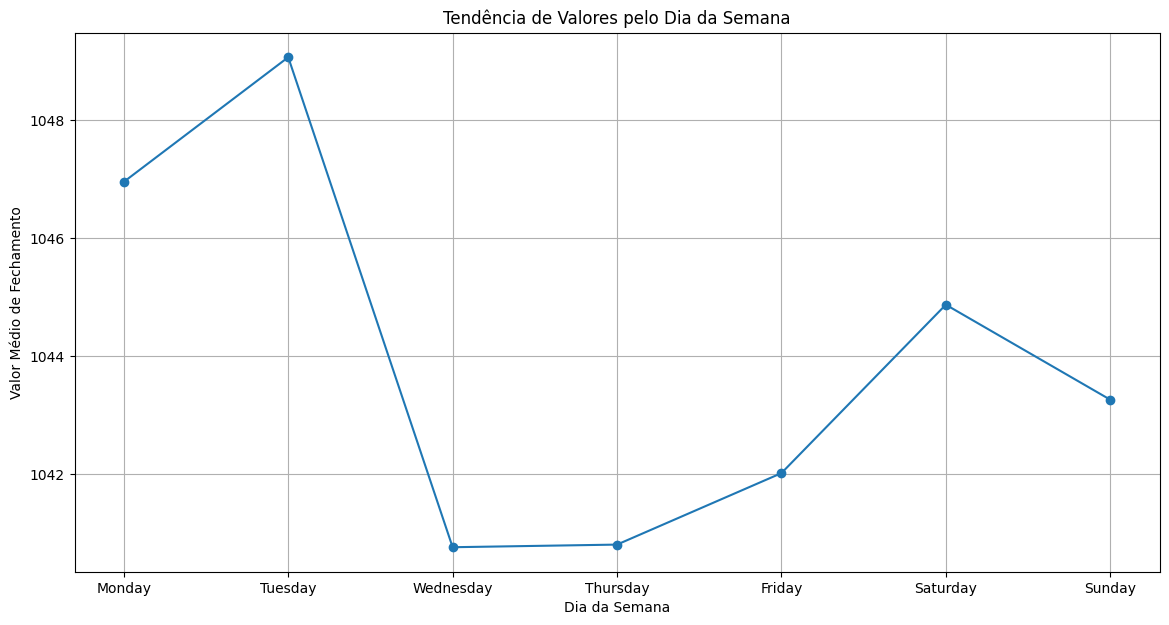

In [ ]:
# Calcular a média dos valores de fechamento por dia da semana
daily_trend = result_df_limpo.groupby('Day_of_Week')['Close'].mean()

# Ordenar os dias da semana na ordem correta
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trend = daily_trend.reindex(ordered_days)

# Plotar a tendência diária
plt.figure(figsize=(14, 7))
plt.plot(daily_trend.index, daily_trend.values, marker='o', linestyle='-')
plt.title('Tendência de Valores pelo Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Valor Médio de Fechamento')
plt.grid(True)
plt.show()

In [ ]:
daily_trend


Day_of_Week
Monday      1,046.954
Tuesday     1,049.067
Wednesday   1,040.760
Thursday    1,040.805
Friday      1,042.016
Saturday    1,044.871
Sunday      1,043.261
Name: Close, dtype: float64

## 5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série
## 6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série

In [ ]:
# Calcular a porcentagem de variação e adicionar ao DataFrame
result_df_limpo.loc[:, '% Variation'] = (result_df_limpo['Variation (%)'] / result_df_limpo['Open']) * 100

# Agrupar o DataFrame pelo nome e somar as variações
agrupado = result_df_limpo.groupby('Name')['Variation (%)'].sum().reset_index().round(2)

# Encontrar a criptomoeda com maior valorização e menor valorização
mais_interessante = agrupado.loc[agrupado['Variation (%)'].idxmax()]
menos_interessante = agrupado.loc[agrupado['Variation (%)'].idxmin()]

# Imprimir os resultados
print(f"Criptomoeda mais interessante: {mais_interessante['Name']} com variação total de {mais_interessante['Variation (%)']}")
print(f"Criptomoeda menos interessante: {menos_interessante['Name']} com variação total de {menos_interessante['Variation (%)']}")

# Exibir o DataFrame agrupado
agrupado

Criptomoeda mais interessante: Dogecoin com variação total de 15.59
Criptomoeda menos interessante: Polkadot com variação total de 1.83


,Name,Variation (%)
0,Binance Coin,11.420
1,Bitcoin,5.790
2,Cardano,8.200
3,Chainlink,8.700
4,Dogecoin,15.590
5,Ethereum,11.020
6,Litecoin,5.640
7,Polkadot,1.830
8,Stellar,12.170
9,XRP,9.950


## 7. Existe correlação entre os valores para todas as criptomoedas?

In [ ]:
# Pivotando os dados para ter as moedas como colunas
pivot_df = result_df_limpo.pivot_table(index='Date', columns='Name', values='Close')
correlation = pivot_df.corr()
print(correlation)

Name          Binance Coin  Bitcoin  Cardano  Chainlink  Dogecoin  Ethereum  \
Name                                                                          
Binance Coin         1.000    0.856    0.893      0.869     0.889     0.904   
Bitcoin              0.856    1.000    0.855      0.934     0.648     0.904   
Cardano              0.893    0.855    1.000      0.811     0.831     0.961   
Chainlink            0.869    0.934    0.811      1.000     0.731     0.863   
Dogecoin             0.889    0.648    0.831      0.731     1.000     0.838   
Ethereum             0.904    0.904    0.961      0.863     0.838     1.000   
Litecoin             0.644    0.807    0.767      0.570     0.541     0.831   
Polkadot             0.842    0.951    0.843      0.936     0.559     0.835   
Stellar              0.610    0.761    0.784      0.540     0.531     0.821   
XRP                  0.484    0.613    0.649      0.322     0.489     0.700   

Name          Litecoin  Polkadot  Stellar   XRP  
N

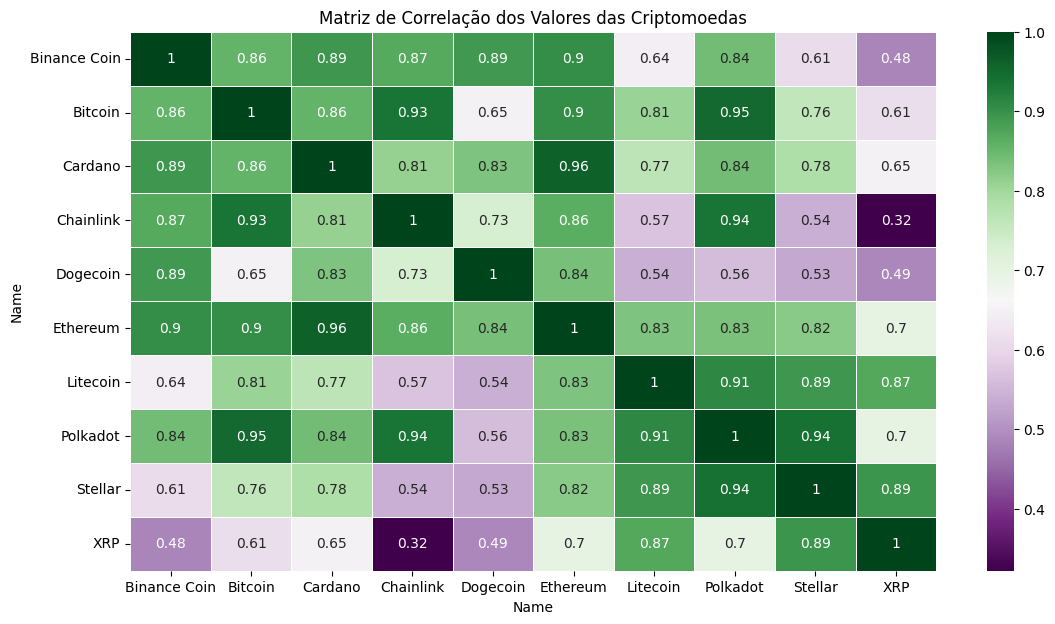

In [ ]:
# Plotar a correlação
plt.figure(figsize=(13, 7))
sns.heatmap(correlation, annot=True, cmap='PRGn', linewidths=0.5)
plt.title('Matriz de Correlação dos Valores das Criptomoedas')
plt.show()

In [ ]:
result_df_limpo

,Name,Date,High,Low,Open,Close,Volume,Marketcap,Day_of_Week,Variation,Variation (%),Year,% Variation
0,Bitcoin,2013-12-27,777.510,713.600,763.280,735.070,"46,862,700.000","8,955,394,563.500",Friday,-28.210,-0.037,2013,-0.005
1,Bitcoin,2013-12-28,747.060,705.350,737.980,727.830,"32,505,800.000","8,869,918,644.000",Saturday,-10.150,-0.014,2013,-0.002
2,Bitcoin,2013-12-29,748.610,714.440,728.050,745.050,"19,011,300.000","9,082,103,621.250",Sunday,17.000,0.023,2013,0.003
3,Bitcoin,2013-12-30,766.600,740.240,741.350,756.130,"20,707,700.000","9,217,167,990.250",Monday,14.780,0.020,2013,0.003
4,Bitcoin,2013-12-31,760.580,738.170,760.320,754.010,"20,897,300.000","9,191,325,349.250",Tuesday,-6.310,-0.008,2013,-0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20187,Dogecoin,2021-07-02,0.248,0.239,0.244,0.245,"1,321,470,954.370","31,949,253,278.160",Friday,0.001,0.005,2021,2.153
20188,Dogecoin,2021-07-03,0.250,0.242,0.245,0.246,"917,015,818.900","32,104,908,914.690",Saturday,0.001,0.005,2021,2.173
20189,Dogecoin,2021-07-04,0.253,0.243,0.246,0.246,"973,511,518.610","32,117,665,810.760",Sunday,0.000,0.000,2021,0.096
20190,Dogecoin,2021-07-05,0.246,0.228,0.246,0.232,"1,267,949,362.220","30,183,443,827.370",Monday,-0.015,-0.060,2021,-24.381


# Conversão do dataframe para .CSV

In [ ]:
result_df_limpo

,Name,Date,High,Low,Open,Close,Volume,Marketcap,Day_of_Week,Variation,Variation (%),Year,% Variation
0,Bitcoin,2013-12-27,777.510,713.600,763.280,735.070,"46,862,700.000","8,955,394,563.500",Friday,-28.210,-0.037,2013,-0.005
1,Bitcoin,2013-12-28,747.060,705.350,737.980,727.830,"32,505,800.000","8,869,918,644.000",Saturday,-10.150,-0.014,2013,-0.002
2,Bitcoin,2013-12-29,748.610,714.440,728.050,745.050,"19,011,300.000","9,082,103,621.250",Sunday,17.000,0.023,2013,0.003
3,Bitcoin,2013-12-30,766.600,740.240,741.350,756.130,"20,707,700.000","9,217,167,990.250",Monday,14.780,0.020,2013,0.003
4,Bitcoin,2013-12-31,760.580,738.170,760.320,754.010,"20,897,300.000","9,191,325,349.250",Tuesday,-6.310,-0.008,2013,-0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20187,Dogecoin,2021-07-02,0.248,0.239,0.244,0.245,"1,321,470,954.370","31,949,253,278.160",Friday,0.001,0.005,2021,2.153
20188,Dogecoin,2021-07-03,0.250,0.242,0.245,0.246,"917,015,818.900","32,104,908,914.690",Saturday,0.001,0.005,2021,2.173
20189,Dogecoin,2021-07-04,0.253,0.243,0.246,0.246,"973,511,518.610","32,117,665,810.760",Sunday,0.000,0.000,2021,0.096
20190,Dogecoin,2021-07-05,0.246,0.228,0.246,0.232,"1,267,949,362.220","30,183,443,827.370",Monday,-0.015,-0.060,2021,-24.381


# Em quais anos houve maiores quedas e valorizações

In [ ]:
# Encontrando o ano com maior valorização e maior queda para cada moeda
idx_max_increase = annual_close.groupby('Name')['Annual_Variation_%'].idxmax()
idx_max_decrease = annual_close.groupby('Name')['Annual_Variation_%'].idxmin()

# Filtrando os dados originais com base nos índices encontrados
max_increase_data = annual_close.loc[idx_max_increase]
max_decrease_data = annual_close.loc[idx_max_decrease]

# Imprimindo os resultados
print("Ano das maiores valorizações:")
for index, row in max_increase_data.iterrows():
    print(f"Moeda: {row['Name']}, Ano: {int(row['Year'])}, Variação média: {row['Annual_Variation_%']:.2f}%")

print("\nAno das maiores quedas:")
for index, row in max_decrease_data.iterrows():
    print(f"Moeda: {row['Name']}, Ano: {int(row['Year'])}, Variação média: {row['Annual_Variation_%']:.2f}%")

Ano das maiores valorizações:
Moeda: Binance Coin, Ano: 2021, Variação média: 7.59%
Moeda: Bitcoin, Ano: 2017, Variação média: 13.69%
Moeda: Cardano, Ano: 2021, Variação média: 6.82%
Moeda: Chainlink, Ano: 2020, Variação média: 5.37%
Moeda: Dogecoin, Ano: 2021, Variação média: 49.07%
Moeda: Ethereum, Ano: 2017, Variação média: 93.96%
Moeda: Litecoin, Ano: 2017, Variação média: 52.66%
Moeda: Polkadot, Ano: 2021, Variação média: 0.74%
Moeda: Stellar, Ano: 2017, Variação média: 145.11%
Moeda: XRP, Ano: 2017, Variação média: 355.74%

Ano das maiores quedas:
Moeda: Binance Coin, Ano: 2018, Variação média: -0.29%
Moeda: Bitcoin, Ano: 2018, Variação média: -0.74%
Moeda: Cardano, Ano: 2018, Variação média: -0.94%
Moeda: Chainlink, Ano: 2018, Variação média: -0.52%
Moeda: Dogecoin, Ano: 2018, Variação média: -0.74%
Moeda: Ethereum, Ano: 2018, Variação média: -0.82%
Moeda: Litecoin, Ano: 2014, Variação média: -0.89%
Moeda: Polkadot, Ano: 2021, Variação média: 0.74%
Moeda: Stellar, Ano: 2018, Var